In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0
Pandas version: 2.2.2


In [4]:
column_names = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'
]

try:
    df = pd.read_csv('zoo.data', header=None, names=column_names)
    print("Dataset loaded from local file")
except:
    print("Please upload zoo.data file")
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv('zoo.data', header=None, names=column_names)

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n🔍 First 5 rows:")
print(df.head())

Dataset loaded from local file

📊 Dataset Shape: (101, 18)
Rows: 101, Columns: 18

🔍 First 5 rows:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     

In [5]:
print("="*80)
print("DATA UNDERSTANDING")
print("="*80)

# Basic info
print("\n📋 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

# Check missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Check duplicates
print(f"\n🔄 Duplicate Rows: {df.duplicated().sum()}")

# Target distribution
print("\n🎯 Target Distribution (Type):")
print(df['type'].value_counts().sort_index())

# Class names mapping
class_names = {
    1: 'Mammal',
    2: 'Bird',
    3: 'Reptile',
    4: 'Fish',
    5: 'Amphibian',
    6: 'Bug',
    7: 'Invertebrate'
}
print("\n📝 Class Mapping:")
for k, v in class_names.items():
    count = (df['type'] == k).sum()
    print(f"  Class {k} ({v}): {count} instances")

DATA UNDERSTANDING

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usa


EXPLORATORY DATA ANALYSIS


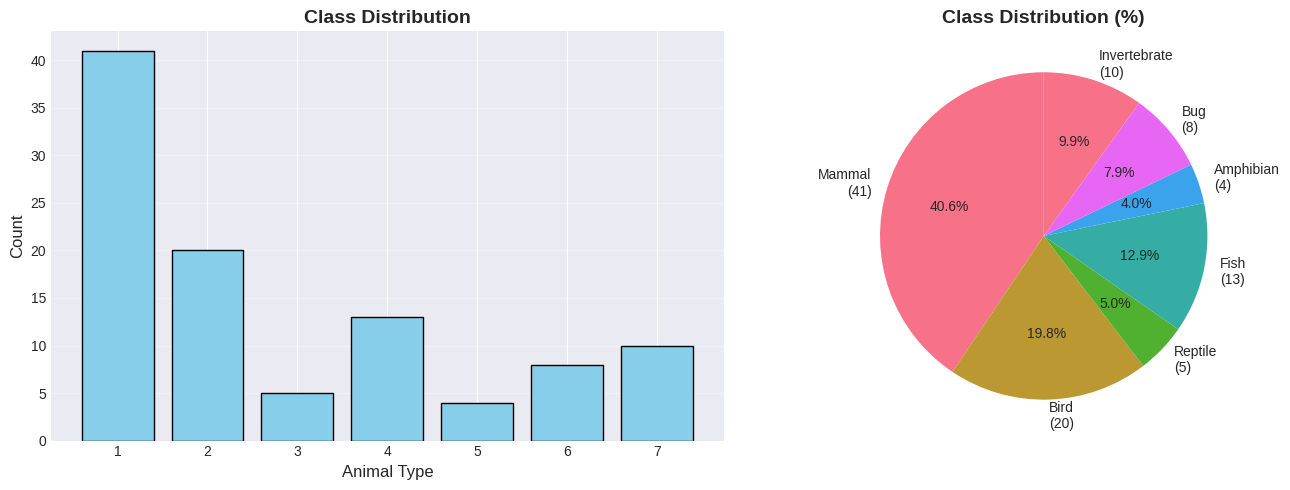


💡 Insight:
- Dataset memiliki class imbalance
- Mammal (class 1) paling banyak: 41 instances
- Amphibian (class 5) paling sedikit: 4 instances

--------------------------------------------------------------------------------


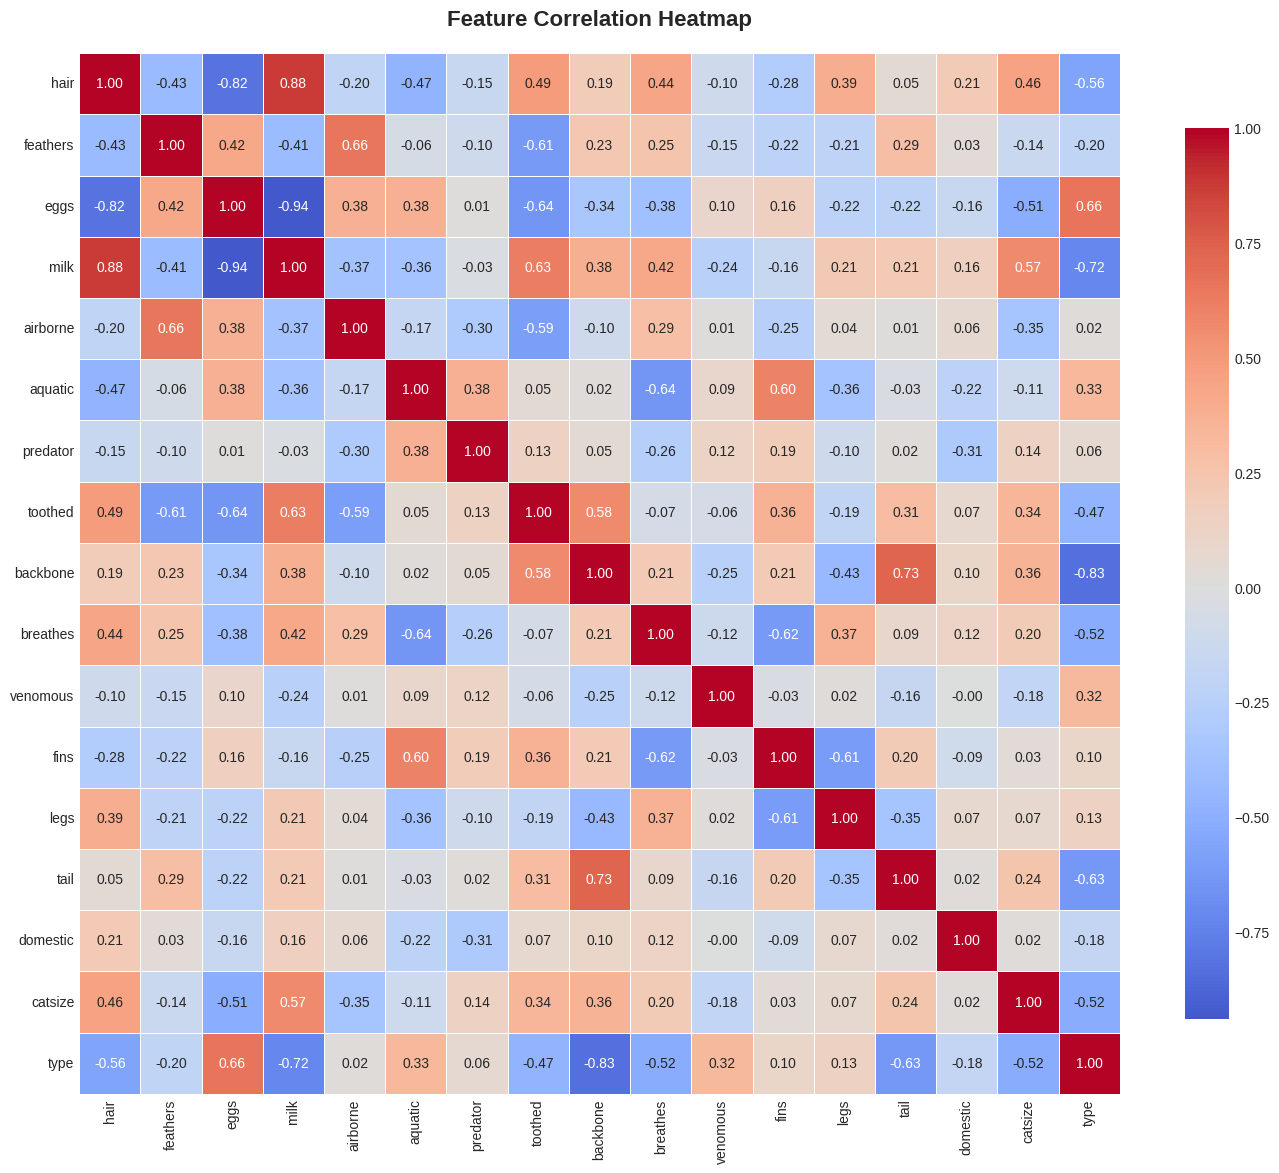


💡 Insight:
- 'milk' strongly correlated dengan 'hair' (mammals)
- 'feathers' strong indicator untuk birds
- 'aquatic' dan 'fins' correlated (fish)
- 'eggs' negatively correlated dengan 'milk'


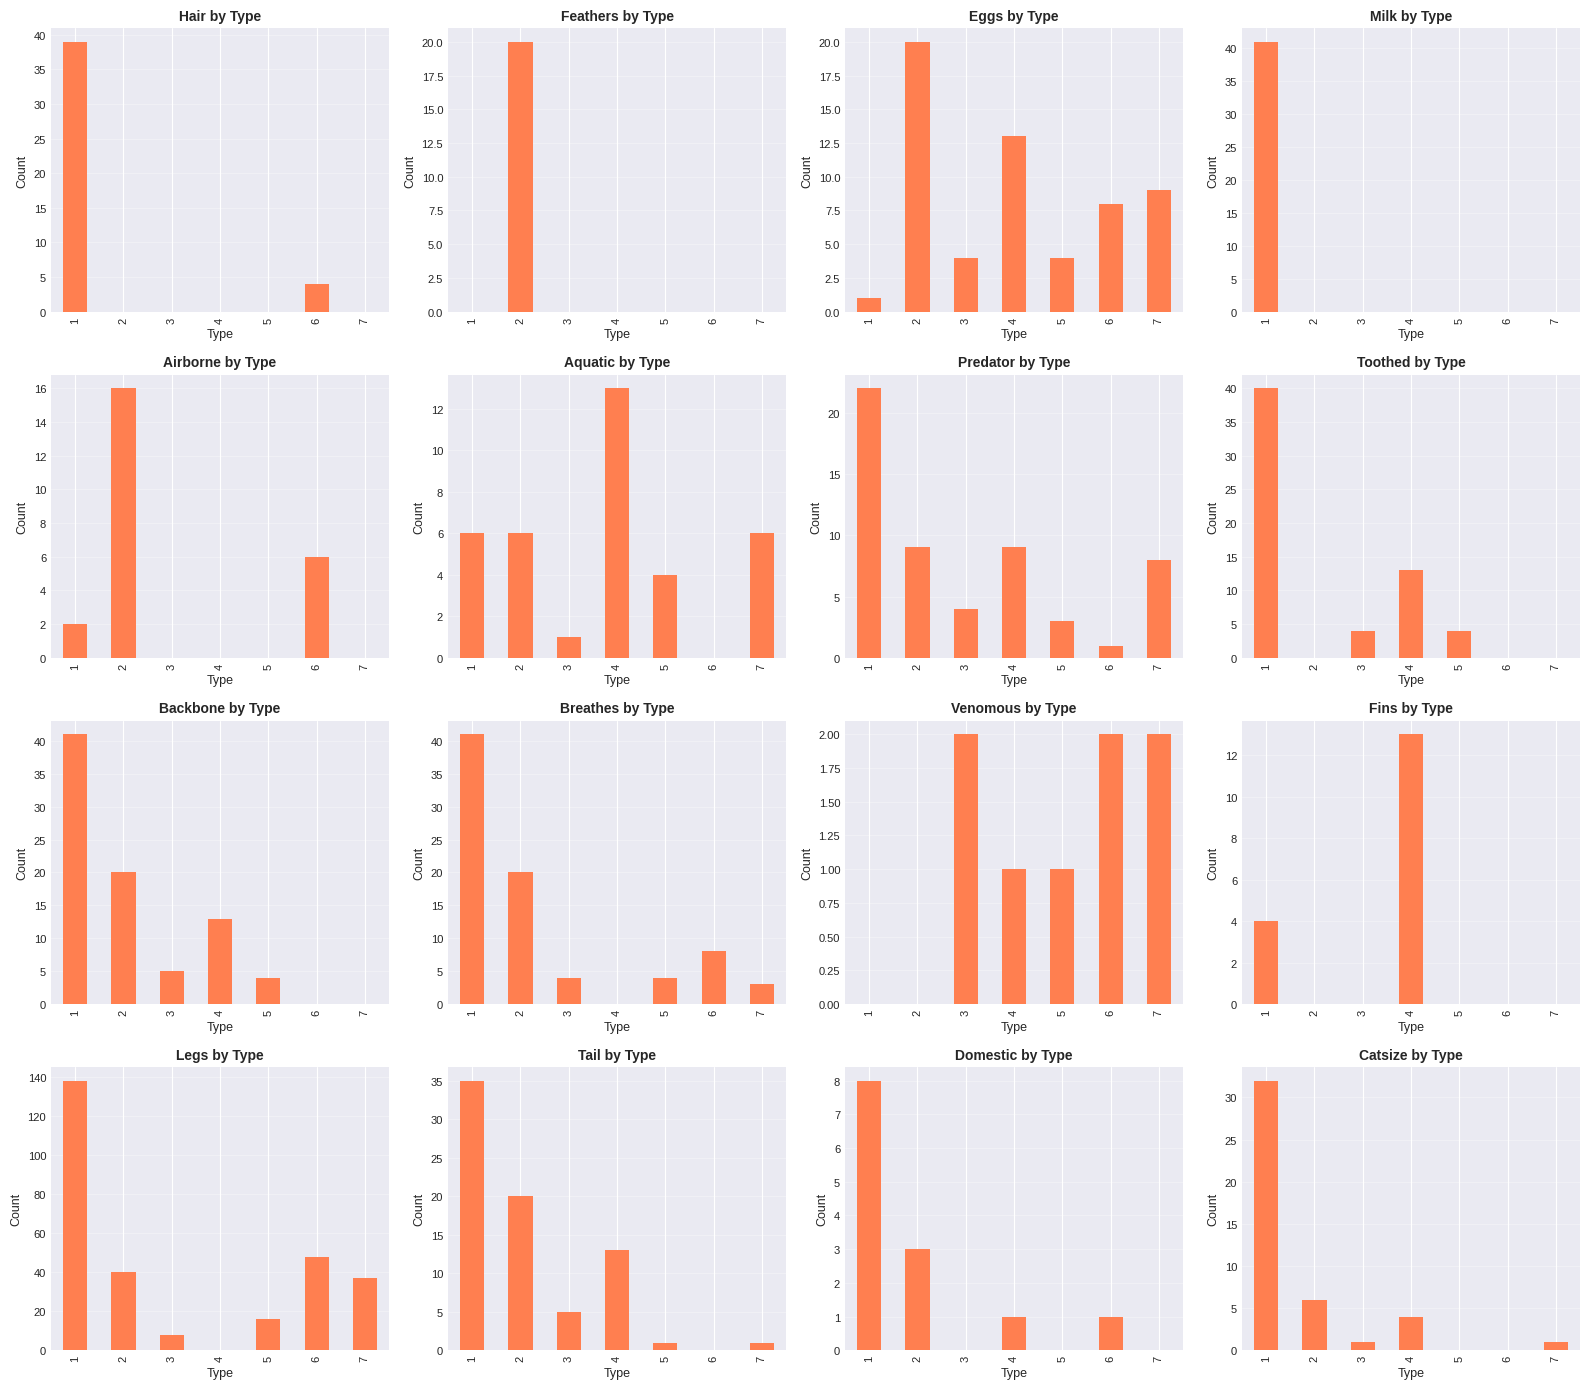


💡 Insight:
- Setiap class memiliki pattern karakteristik yang unik
- Birds (type 2) dominan memiliki 'feathers'
- Mammals (type 1) dominan memiliki 'hair' dan 'milk'
- Fish (type 4) dominan memiliki 'aquatic' dan 'fins'


In [6]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# EDA 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
type_counts = df['type'].value_counts().sort_index()
axes[0].bar(type_counts.index, type_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Animal Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 8))
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
labels = [f"{class_names[i]}\n({type_counts[i]})" for i in type_counts.index]
axes[1].pie(type_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Insight:")
print("- Dataset memiliki class imbalance")
print("- Mammal (class 1) paling banyak: 41 instances")
print("- Amphibian (class 5) paling sedikit: 4 instances")

# EDA 2: Feature Correlation Heatmap
print("\n" + "-"*80)
features_only = df.drop(['animal_name'], axis=1)
correlation_matrix = features_only.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Insight:")
print("- 'milk' strongly correlated dengan 'hair' (mammals)")
print("- 'feathers' strong indicator untuk birds")
print("- 'aquatic' dan 'fins' correlated (fish)")
print("- 'eggs' negatively correlated dengan 'milk'")

# EDA 3: Feature Distribution by Type
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

feature_cols = [col for col in df.columns if col not in ['animal_name', 'type']]

for idx, col in enumerate(feature_cols):
    if idx < len(axes):
        df.groupby('type')[col].sum().plot(kind='bar', ax=axes[idx], color='coral')
        axes[idx].set_title(f'{col.capitalize()} by Type', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Type', fontsize=9)
        axes[idx].set_ylabel('Count', fontsize=9)
        axes[idx].tick_params(labelsize=8)
        axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Insight:")
print("- Setiap class memiliki pattern karakteristik yang unik")
print("- Birds (type 2) dominan memiliki 'feathers'")
print("- Mammals (type 1) dominan memiliki 'hair' dan 'milk'")
print("- Fish (type 4) dominan memiliki 'aquatic' dan 'fins'")

In [7]:
print("\n" + "="*80)
print("DATA PREPARATION")
print("="*80)

# Separate features and target
X = df.drop(['animal_name', 'type'], axis=1)
y = df['type']

# Encode target (1-7 menjadi 0-6 untuk neural network)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y_encoded.shape}")
print(f"✅ Classes: {np.unique(y_encoded)} (encoded from {np.unique(y)})")

# Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n📊 Train set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")

# Feature Scaling (untuk Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data scaling completed")
print(f"Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"Std after scaling: {X_train_scaled.std():.6f}")

# Save scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n💾 Scaler saved to 'scaler.pkl'")


DATA PREPARATION

✅ Features shape: (101, 16)
✅ Target shape: (101,)
✅ Classes: [0 1 2 3 4 5 6] (encoded from [1 2 3 4 5 6 7])

📊 Train set: 80 samples
📊 Test set: 21 samples

✅ Data scaling completed
Mean after scaling: 0.000000
Std after scaling: 1.000000

💾 Scaler saved to 'scaler.pkl'



MODEL 1: BASELINE - DECISION TREE

🔧 Training Decision Tree...

✅ Training completed in 0.00 seconds

📊 Decision Tree Performance:
  Accuracy:  1.0000 (100.00%)
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

📋 Classification Report:
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         3
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



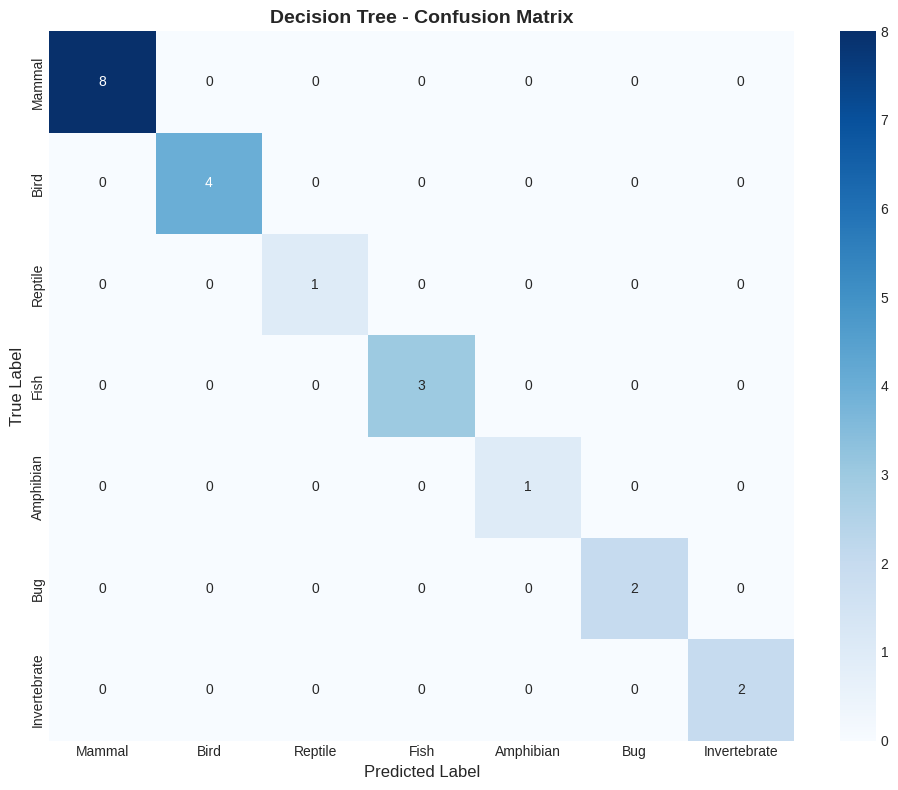


💾 Model saved to 'model_baseline.pkl'


In [8]:
print("\n" + "="*80)
print("MODEL 1: BASELINE - DECISION TREE")
print("="*80)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

print("\n🔧 Training Decision Tree...")
import time
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time_dt = time.time() - start_time

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print(f"\n✅ Training completed in {training_time_dt:.2f} seconds")
print("\n📊 Decision Tree Performance:")
print(f"  Accuracy:  {acc_dt:.4f} ({acc_dt*100:.2f}%)")
print(f"  Precision: {prec_dt:.4f}")
print(f"  Recall:    {rec_dt:.4f}")
print(f"  F1-Score:  {f1_dt:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_dt,
                          target_names=[class_names[i+1] for i in range(7)],
                          zero_division=0))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i+1] for i in range(7)],
            yticklabels=[class_names[i+1] for i in range(7)])
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('dt_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Save model
with open('model_baseline.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print("\n💾 Model saved to 'model_baseline.pkl'")


MODEL 2: ADVANCED - RANDOM FOREST

🔧 Training Random Forest...

✅ Training completed in 0.54 seconds

📊 Random Forest Performance:
  Accuracy:  1.0000 (100.00%)
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

📋 Classification Report:
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         3
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



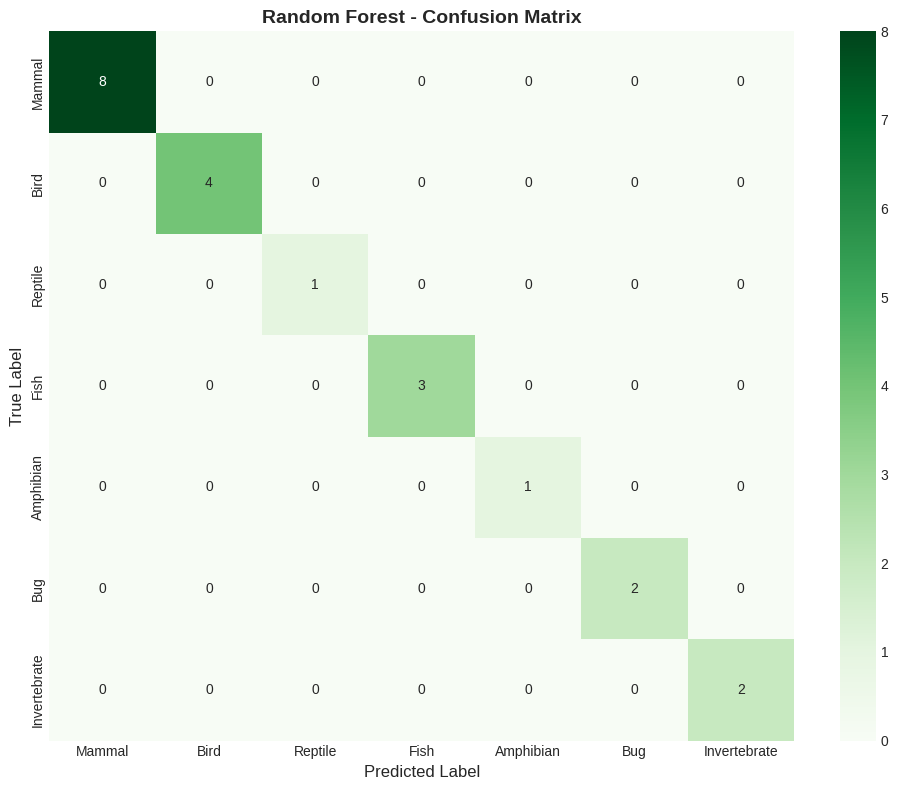

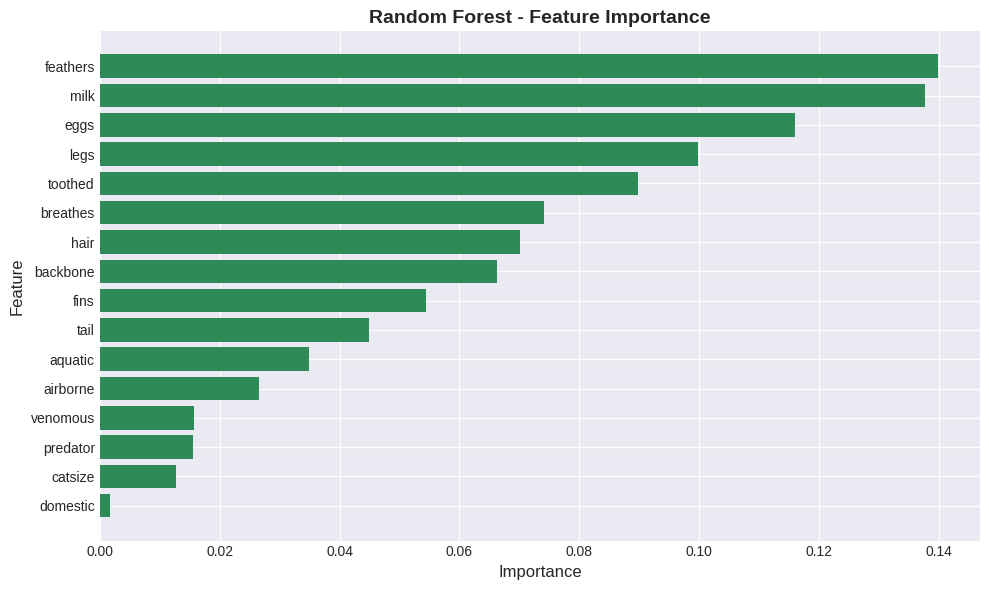


💡 Top 5 Most Important Features:
     feature  importance
1   feathers    0.139808
3       milk    0.137645
2       eggs    0.116025
12      legs    0.099813
7    toothed    0.089716

💾 Model saved to 'model_rf.pkl'


In [9]:
print("\n" + "="*80)
print("MODEL 2: ADVANCED - RANDOM FOREST")
print("="*80)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("\n🔧 Training Random Forest...")
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rec_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"\n✅ Training completed in {training_time_rf:.2f} seconds")
print("\n📊 Random Forest Performance:")
print(f"  Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"  Precision: {prec_rf:.4f}")
print(f"  Recall:    {rec_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=[class_names[i+1] for i in range(7)],
                          zero_division=0))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=[class_names[i+1] for i in range(7)],
            yticklabels=[class_names[i+1] for i in range(7)])
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='seagreen')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Top 5 Most Important Features:")
print(feature_importance.head())

# Save model
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("\n💾 Model saved to 'model_rf.pkl'")


MODEL 3: DEEP LEARNING - NEURAL NETWORK

🏗️ Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)


🔧 Training Neural Network...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.1138 - loss: 2.3093 - val_accuracy: 0.0625 - val_loss: 2.0934 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1705 - loss: 2.1118 - val_accuracy: 0.3125 - val_loss: 1.9097 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2841 - loss: 1.8756 - val_accuracy: 0.5000 - val_loss: 1.7566 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4282 - loss: 1.6897 - val_accuracy: 0.6250 - val_loss: 1.6107 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5674 - loss: 1.5458 - val_accuracy: 0.6875 - val_loss: 1.4680 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6643 - loss: 1.3970 - val_accuracy: 0.6875 - val_loss: 1.3325 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7437 

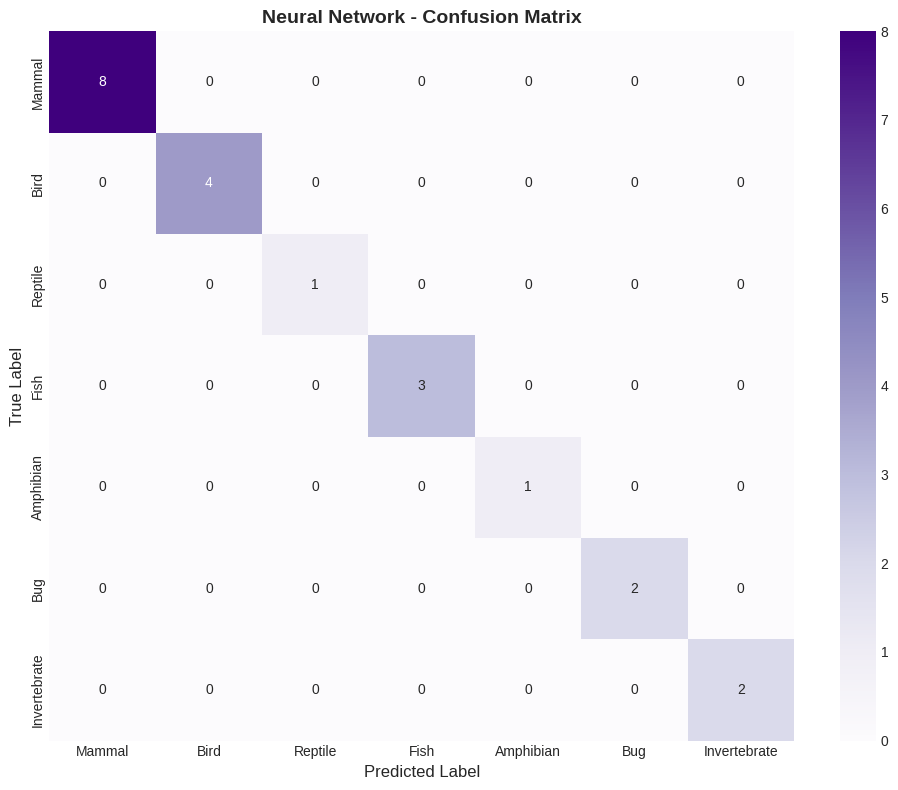


💾 Model saved to 'model_nn.h5'


In [10]:
print("\n" + "="*80)
print("MODEL 3: DEEP LEARNING - NEURAL NETWORK")
print("="*80)

# Build Neural Network Architecture
def build_nn_model(input_dim, num_classes):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', name='dense_1'),
        layers.Dropout(0.3, name='dropout_1'),
        layers.Dense(32, activation='relu', name='dense_2'),
        layers.Dropout(0.3, name='dropout_2'),
        layers.Dense(num_classes, activation='softmax', name='output')
    ])
    return model

# Create model
nn_model = build_nn_model(input_dim=X_train_scaled.shape[1], num_classes=7)

# Model summary
print("\n🏗️ Neural Network Architecture:")
nn_model.summary()

# Compile model
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

# Train model
print("\n🔧 Training Neural Network...")
start_time = time.time()

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

training_time_nn = time.time() - start_time
print(f"\n✅ Training completed in {training_time_nn:.2f} seconds")

# Predictions
y_pred_nn_proba = nn_model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn_proba, axis=1)

# Evaluation
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn, average='weighted', zero_division=0)
rec_nn = recall_score(y_test, y_pred_nn, average='weighted', zero_division=0)
f1_nn = f1_score(y_test, y_pred_nn, average='weighted', zero_division=0)

print("\n📊 Neural Network Performance:")
print(f"  Accuracy:  {acc_nn:.4f} ({acc_nn*100:.2f}%)")
print(f"  Precision: {prec_nn:.4f}")
print(f"  Recall:    {rec_nn:.4f}")
print(f"  F1-Score:  {f1_nn:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_nn,
                          target_names=[class_names[i+1] for i in range(7)],
                          zero_division=0))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples',
            xticklabels=[class_names[i+1] for i in range(7)],
            yticklabels=[class_names[i+1] for i in range(7)])
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('nn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Save model
nn_model.save('model_nn.h5')
print("\n💾 Model saved to 'model_nn.h5'")


TRAINING HISTORY VISUALIZATION


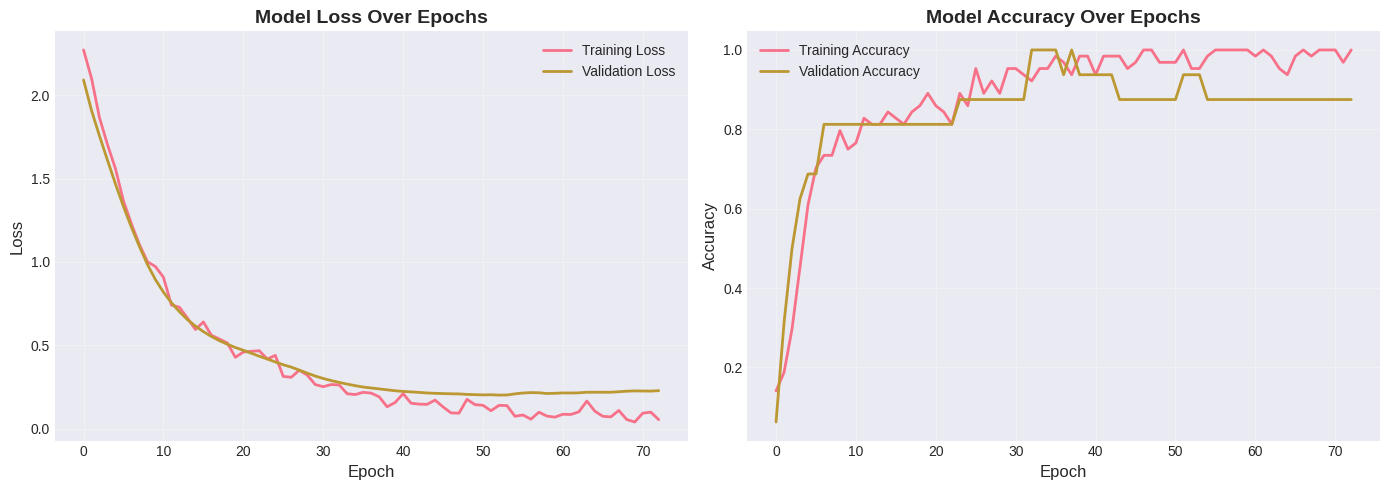


💡 Training Analysis:
- Model converged early at epoch 73
- Early stopping prevented overfitting
⚠️ Model shows signs of overfitting


In [11]:
print("\n" + "="*80)
print("TRAINING HISTORY VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Training Analysis:")
if len(history.history['val_loss']) < 100:
    print(f"- Model converged early at epoch {len(history.history['val_loss'])}")
    print("- Early stopping prevented overfitting")
else:
    print("- Model trained for full 100 epochs")

# Check overfitting
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
if final_val_loss > final_train_loss * 1.5:
    print("⚠️ Model shows signs of overfitting")
else:
    print("✅ No significant overfitting detected")


MODEL COMPARISON

📊 Performance Comparison:
         Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)
 Decision Tree       1.0        1.0     1.0       1.0           0.004953
 Random Forest       1.0        1.0     1.0       1.0           0.535940
Neural Network       1.0        1.0     1.0       1.0          19.922066


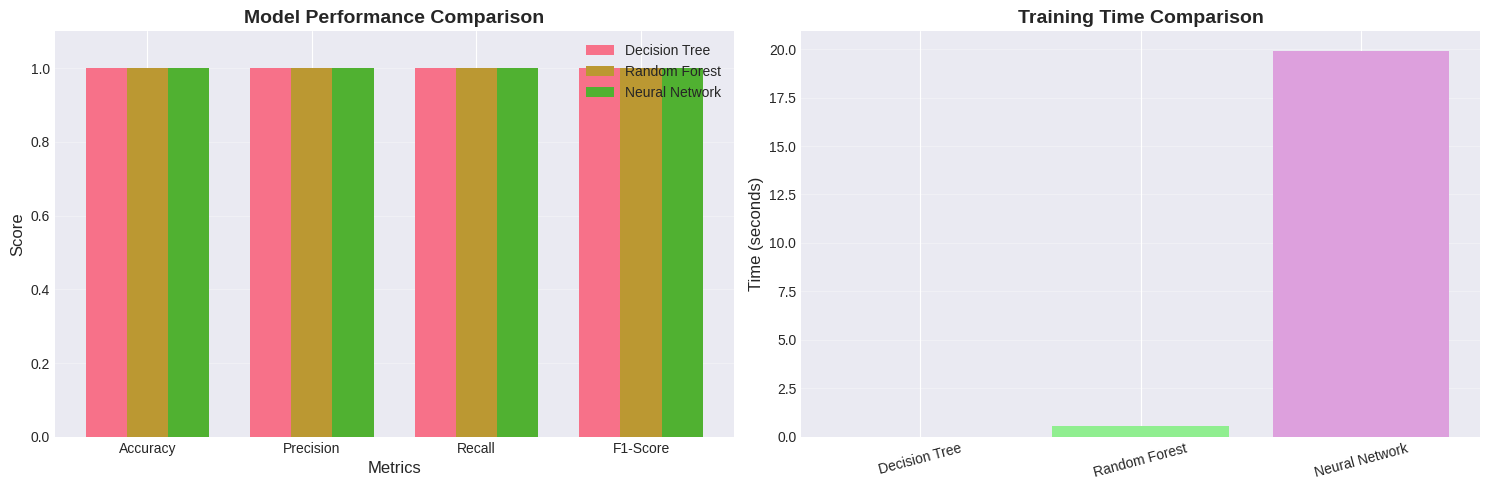

In [12]:
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Neural Network'],
    'Accuracy': [acc_dt, acc_rf, acc_nn],
    'Precision': [prec_dt, prec_rf, prec_nn],
    'Recall': [rec_dt, rec_rf, rec_nn],
    'F1-Score': [f1_dt, f1_rf, f1_nn],
    'Training Time (s)': [training_time_dt, training_time_rf, training_time_nn]
})

print("\n📊 Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(['Decision Tree', 'Random Forest', 'Neural Network']):
    values = comparison_df[comparison_df['Model'] == model][metrics].values[0]
    axes[0].bar(x + i*width, values, width, label=model)

axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1])

# Training time comparison
axes[1].bar(comparison_df['Model'], comparison_df['Training Time (s)'],
           color=['skyblue', 'lightgreen', 'plum'])
axes[1].set_ylabel('Time (seconds)', fontsize=12)
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
